# Zakhar Malov

## Research question/interests

I will research how decisions  made within local markets affect global trends and the whole economy itself.

In [10]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.6/7.6 MB 12.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=00fb93db017b7c2bd63fcc469b3bbd9657c8fd33553413a4d2293ba879c33e00
  Stored in directory: c:\users\malov\appdata\local\pip\cache\wheels\f3\7d\9e\c83a6d3d7f446c2a9b4d7b50013ff690d59c64c8818c5d73ce
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [11]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
import pandas as pd

fundamentalsDF = pd.read_csv('../data/raw/fundamentals.csv')
pricesplitDF = pd.read_csv('../data/raw/prices-split-adjusted.csv')
pricesDF = pd.read_csv('../data/raw/prices.csv')
securitiesDF = pd.read_csv('../data/raw/securities.csv')

In [4]:
fundamentalsDF.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


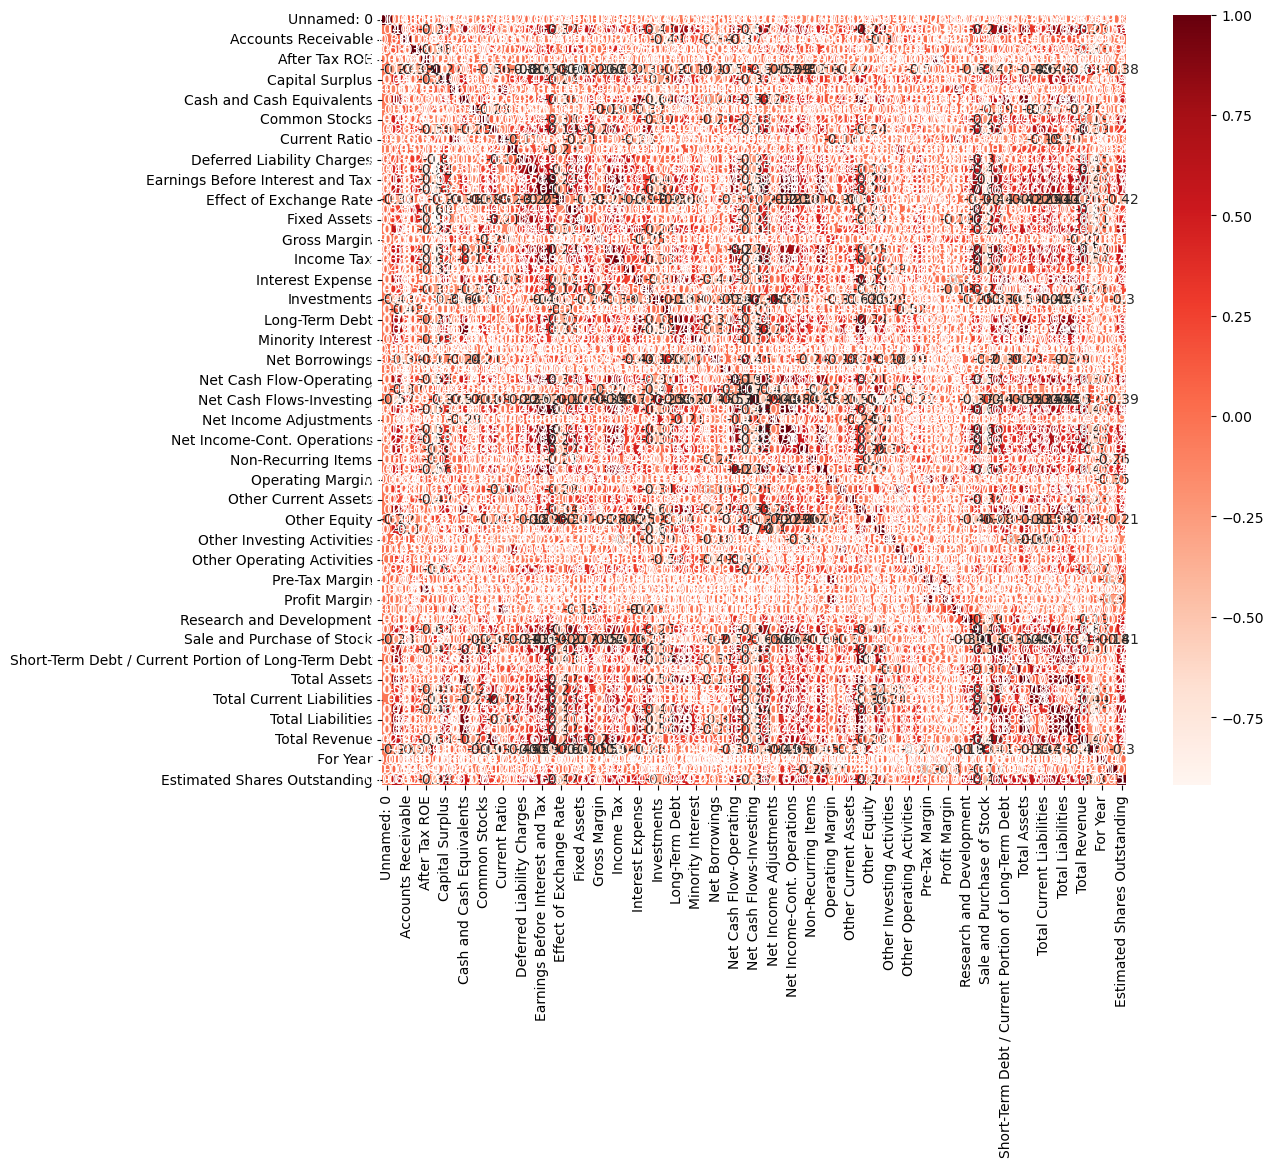

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = fundamentalsDF.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
df_cleanded=fundamentalsDF.copy().drop(['Accounts Receivable'],axis=1)

In [22]:
allfeatures=fundamentalsDF.columns

badfeatures=allfeatures.copy()
badfeatures.remove('Total Revenue')

AttributeError: 'Index' object has no attribute 'remove'

In [14]:
#Correlation with output variable
cor_target = abs(cor["Total Revenue"])#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.5]
relevant_features

Unnamed: 0                                             0.024759
Accounts Receivable                                    0.069428
Add'l income/expense items                             0.283123
After Tax ROE                                          0.023004
Capital Surplus                                        0.243656
Cash Ratio                                             0.118801
Cash and Cash Equivalents                              0.173184
Changes in Inventories                                 0.273296
Common Stocks                                          0.210654
Current Ratio                                          0.141377
Deferred Asset Charges                                 0.215024
Deferred Liability Charges                             0.459717
Effect of Exchange Rate                                0.263962
Goodwill                                               0.366534
Gross Margin                                           0.219122
Intangible Assets                       

In [15]:
#Correlation with output variable
cor_target = abs(cor["Total Revenue"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

Cost of Revenue                     0.957385
Earnings Before Interest and Tax    0.700922
Earnings Before Tax                 0.704684
Gross Profit                        0.817326
Income Tax                          0.701421
Net Income-Cont. Operations         0.702299
Sales, General and Admin.           0.739824
Total Current Liabilities           0.768593
Total Revenue                       1.000000
Name: Total Revenue, dtype: float64

In [8]:
revenueblablarelationship=fundamentalsDF[fundamentalsDF['Total Revenue],'For Year']]

KeyError: ('Total Revenue', 'For Year')

In [6]:
a=fundamentalsDF['Cash Ratio']
a

0       53.0
1       75.0
2       60.0
3       51.0
4       23.0
        ... 
1776     NaN
1777    43.0
1778    81.0
1779    65.0
1780    65.0
Name: Cash Ratio, Length: 1781, dtype: float64